## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [8]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (891, 12)
Test shape: (418, 11)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


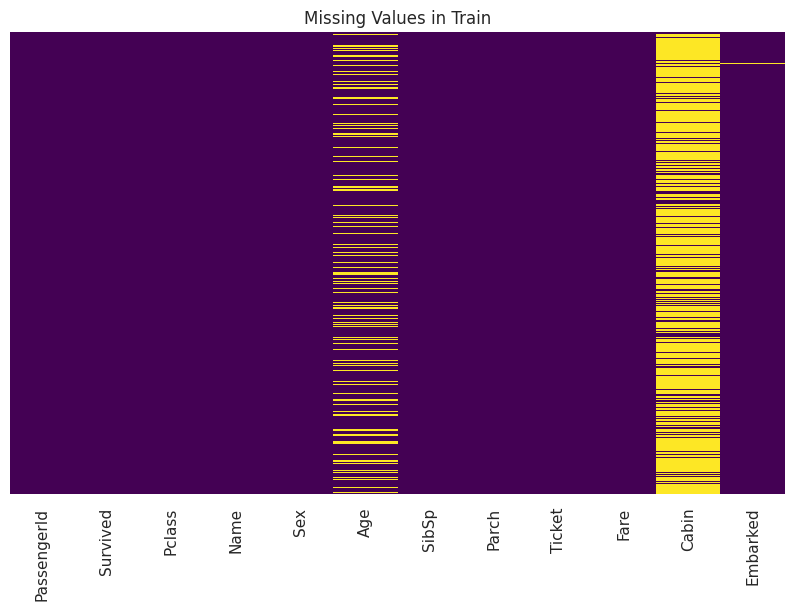

Train missing %:
 Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

Test missing %:
 Cabin          78.229665
Age            20.574163
Fare            0.239234
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64


In [ ]:
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test = test_df.isnull().sum().sort_values(ascending=False)

sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in Train')
plt.show()

print("Train missing %:\n", (missing_train / len(train_df)) * 100)
print("\nTest missing %:\n", (missing_test / len(test_df)) * 100)

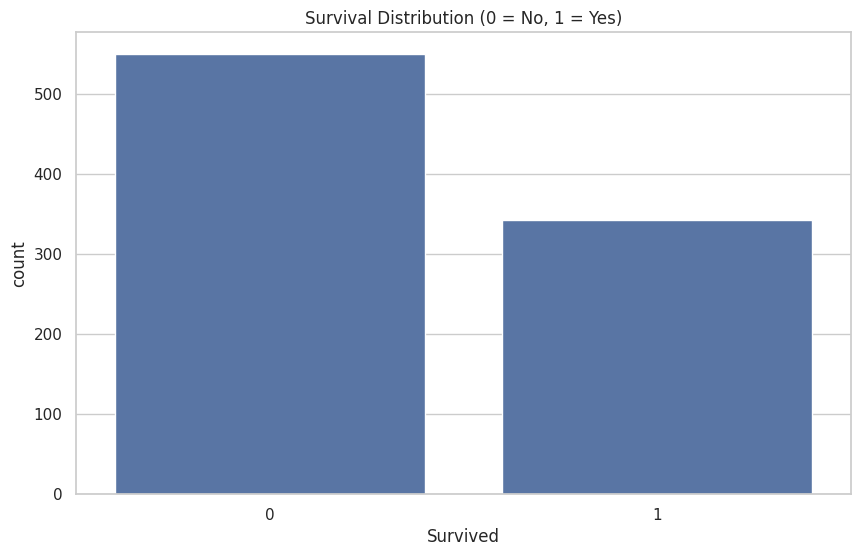

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

In [23]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.show()

print(train_df['Survived'].value_counts(normalize=True) * 100)
plt.savefig('../reports/eda_figures/survival_dist.png')

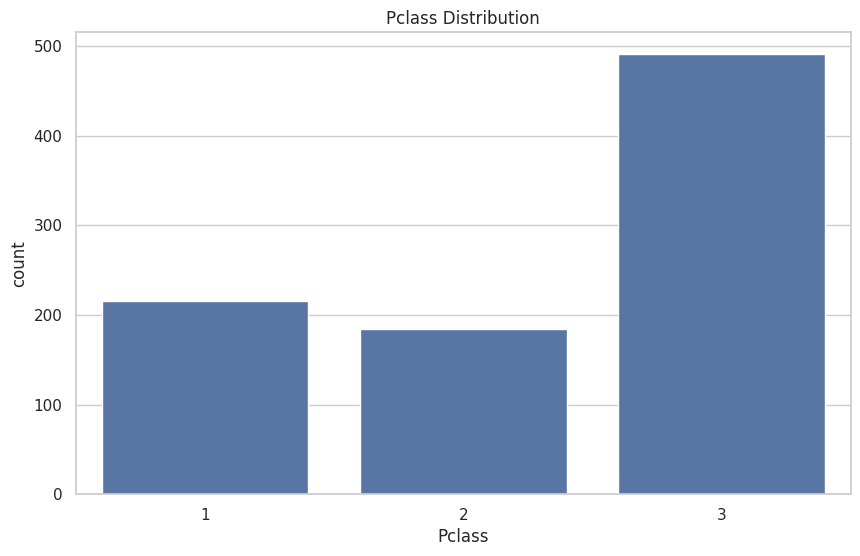

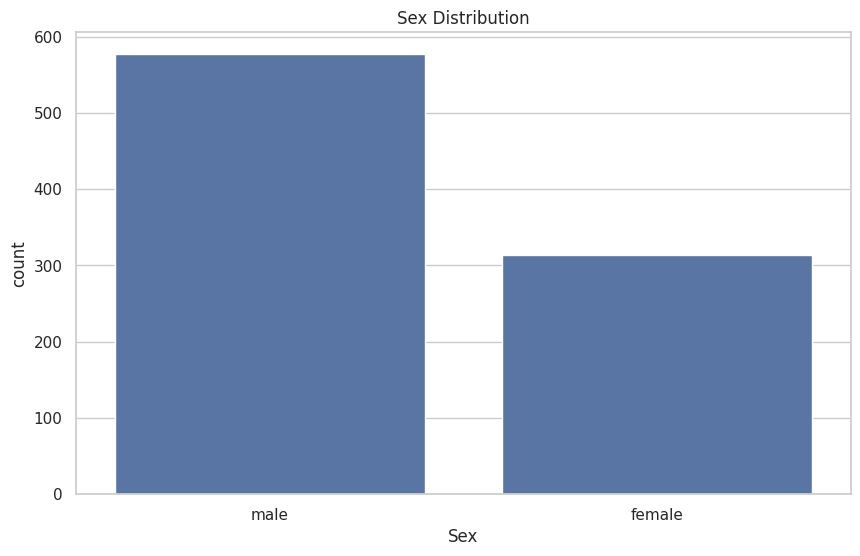

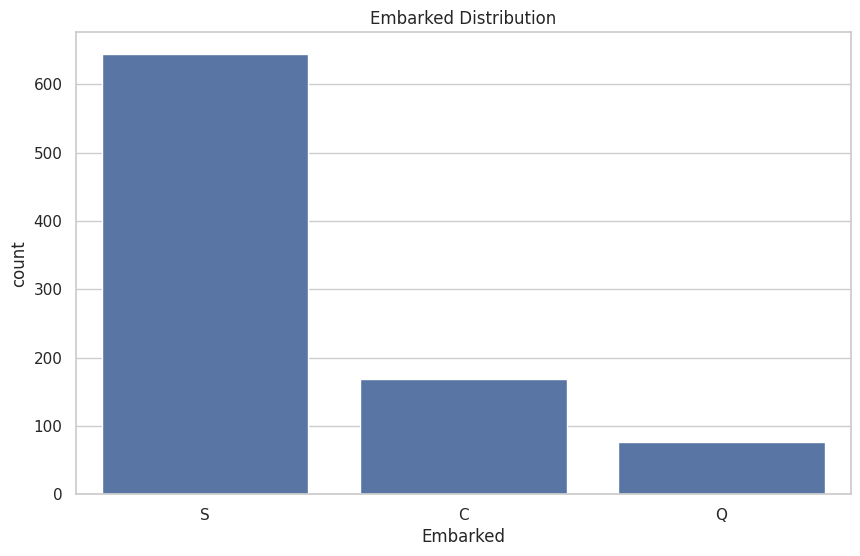

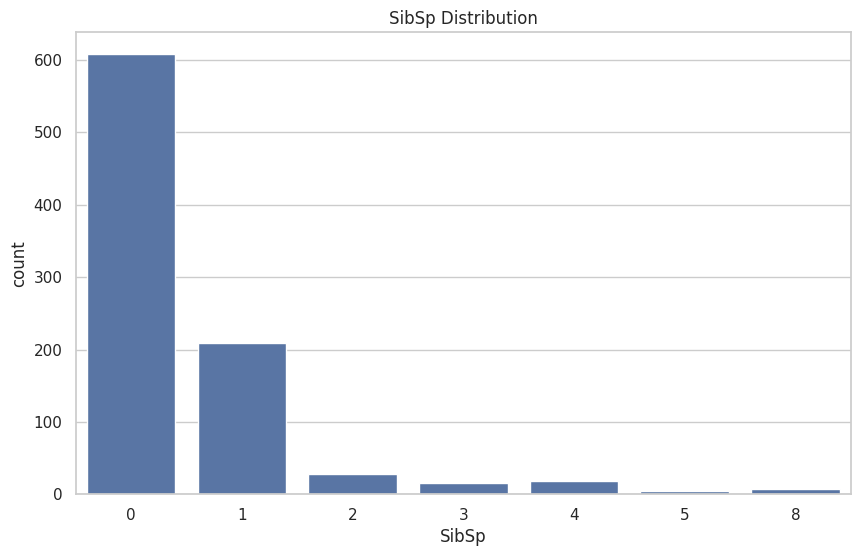

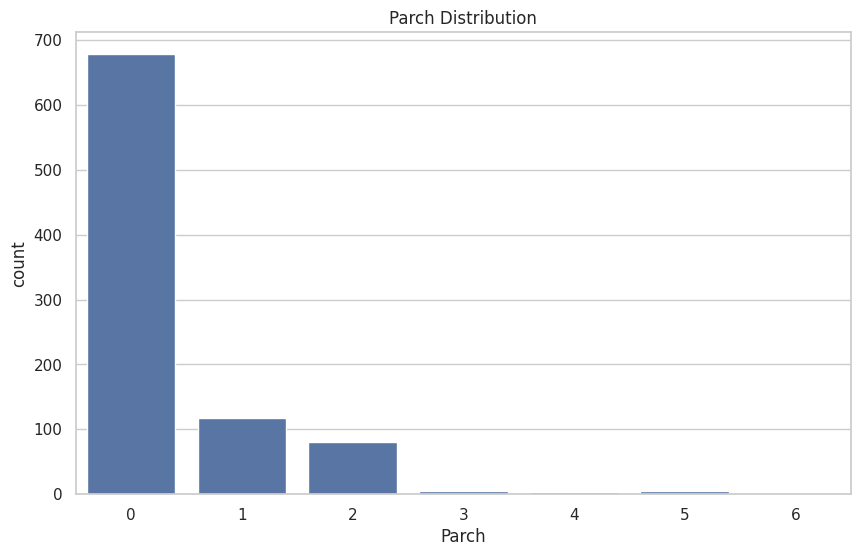

In [27]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

for feature in cat_features:
    sns.countplot(x=feature, data=train_df)
    plt.title(f'{feature} Distribution')
    
    filename = f'../reports/eda_figures/{feature}_distribution.png'
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    
    plt.show()
    

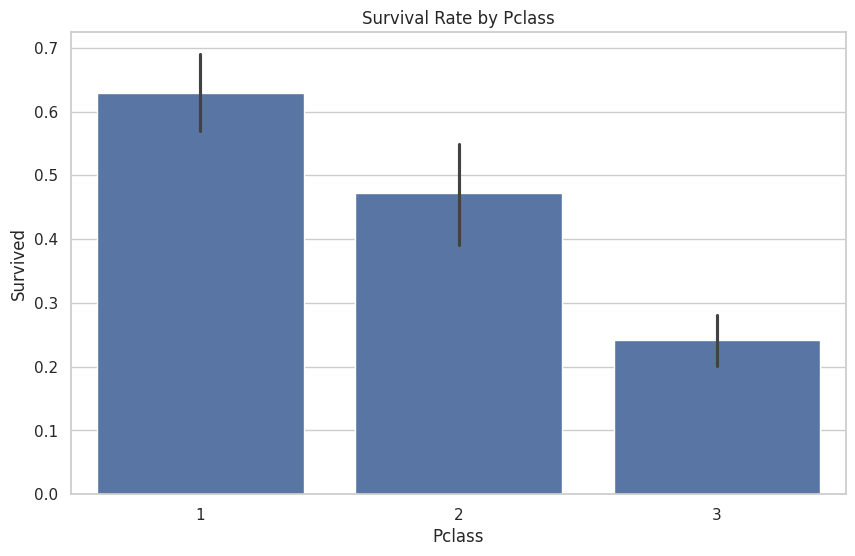

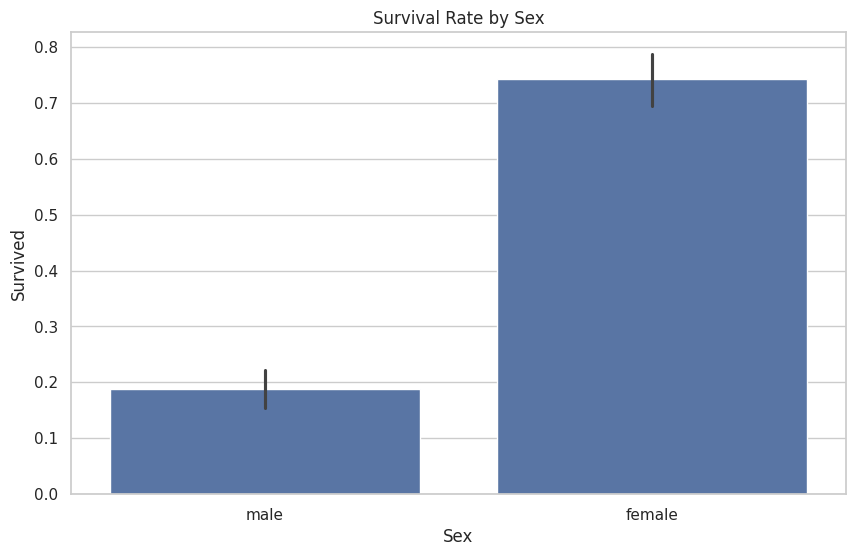

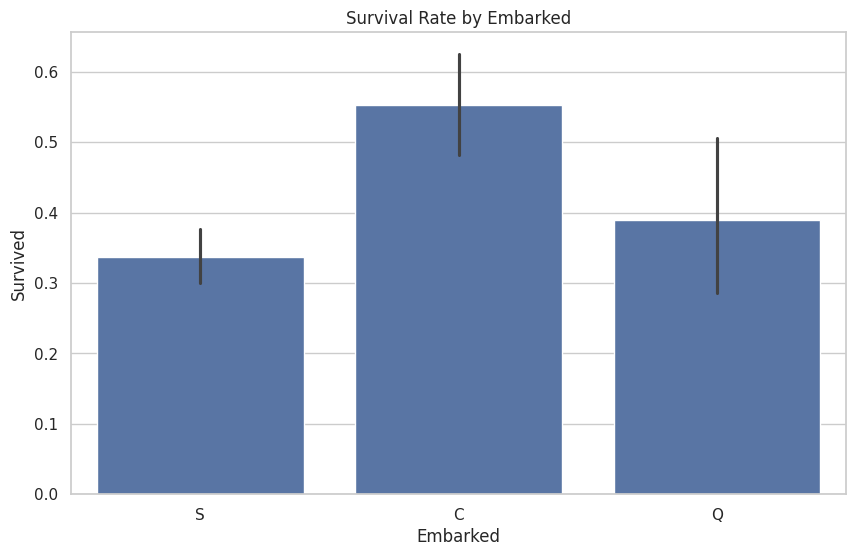

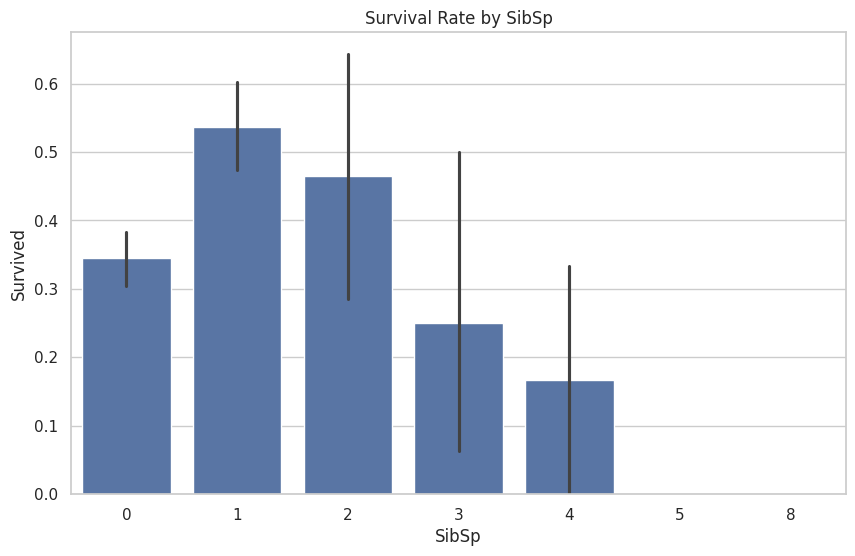

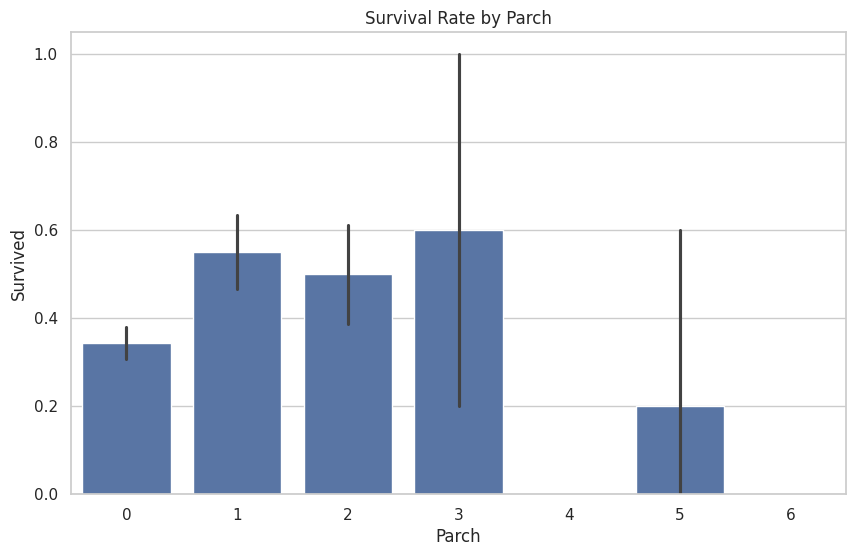

In [28]:
for feature in cat_features:
    sns.barplot(x=feature, y='Survived', data=train_df)
    plt.title(f'Survival Rate by {feature}')
    
    filename = f'../reports/eda_figures/{feature}_survival.png'
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    
    plt.show()

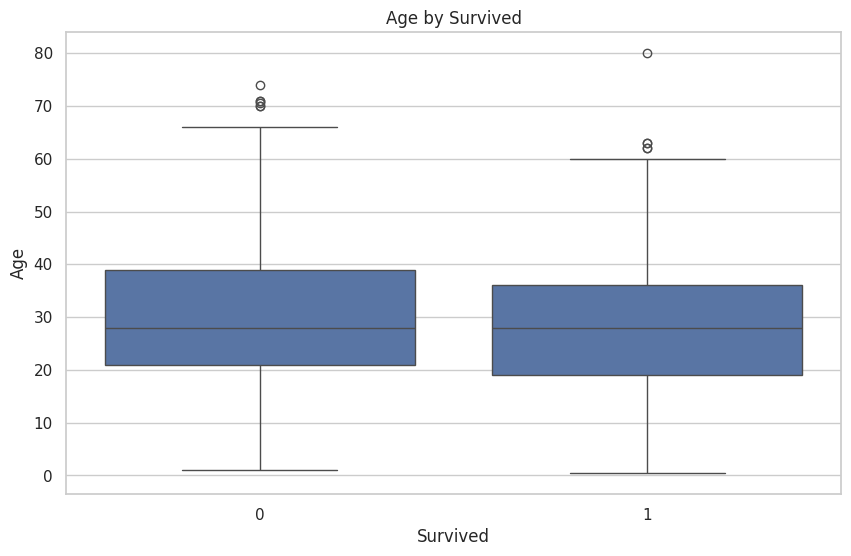

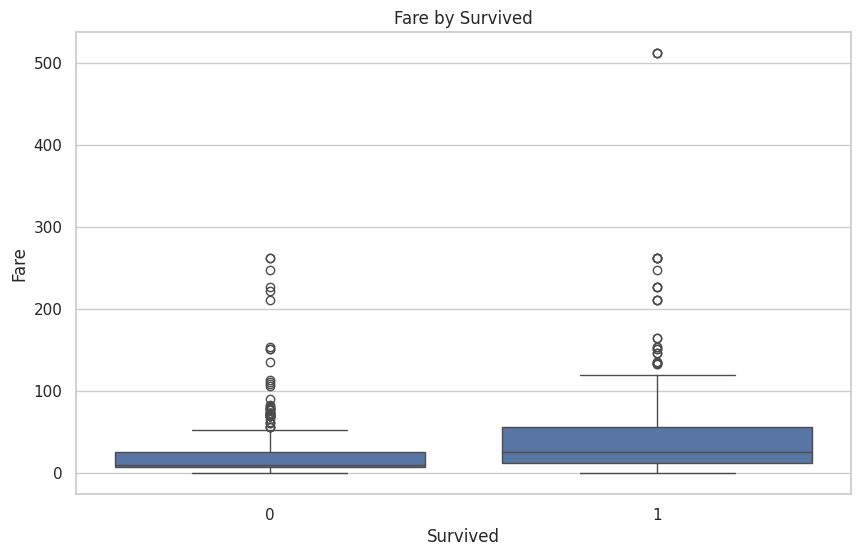

In [31]:
num_features = ['Age', 'Fare']

for feature in num_features:
    sns.boxplot(x='Survived', y=feature, data=train_df)
    plt.title(f'{feature} by Survived')
    
    filename = f'../reports/eda_figures/{feature}_survival.png'
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    
    plt.show()

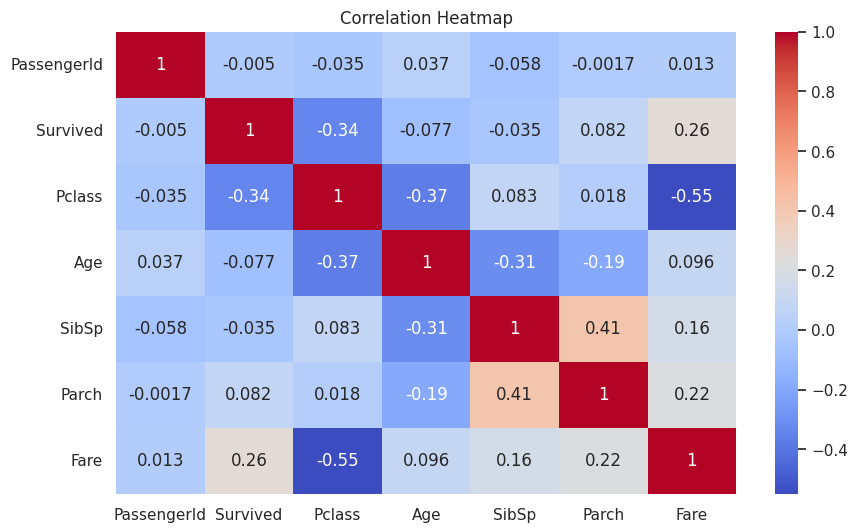

In [32]:
numeric_df = train_df.select_dtypes(include=[np.number])

corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.savefig('../reports/eda_figures/Corr_Heatmap.png', dpi=150, bbox_inches='tight')

plt.show()

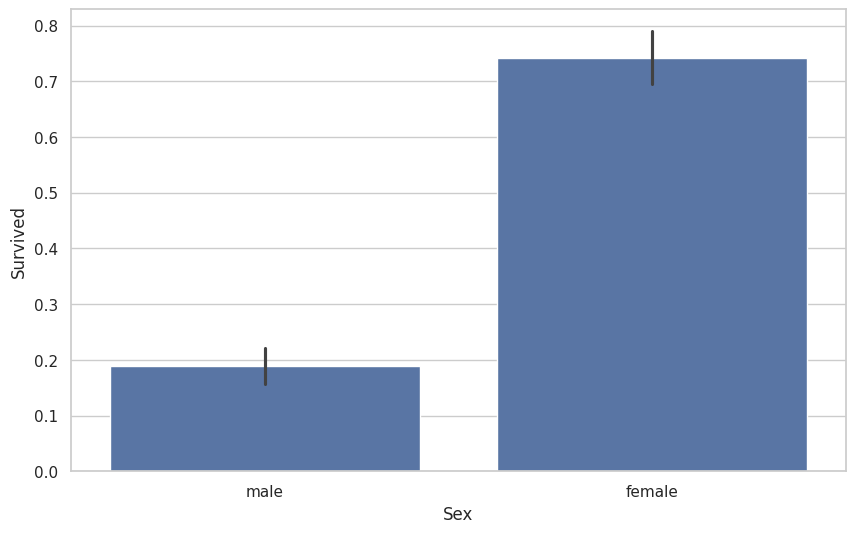

In [22]:
plt.figure()
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.savefig('../reports/eda_figures/survival_by_sex.png')